In [1]:
import pandas as pd
import csv
import torch
import torch.nn.functional as F
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from IPython.core.display import HTML
from matplotlib import animation
from matplotlib.colors import ListedColormap
import ANNlinear as AL

In [2]:
with open('origin.csv') as f:
    df_origin = pd.read_csv(f)
with open('processed.csv') as f:
    df_processed = pd.read_csv(f)

In [3]:
p = df_origin[df_origin['wavenumber'] >= 1e-3]
p = p[p['wavenumber'] <= 2e-2]
p

,(K/u)_L,(K/u)_M,Jm_L,Jm_M,u_L/u_M(Shear contrast),volume contrast,critical strain,wavenumber
252,0.1,0.1,30.0,30.0,100,0.08,0.033031,0.0101
253,0.2,0.2,30.0,30.0,100,0.08,0.033008,0.0101
261,10.0,10.0,90.0,90.0,100,0.08,0.032288,0.0101
262,100.0,100.0,90.0,90.0,100,0.08,0.032288,0.0101
263,1000.0,1000.0,90.0,90.0,100,0.08,0.032288,0.0101
583,0.2,1000.0,1000.0,1000.0,2,0.04,0.192686,0.0101


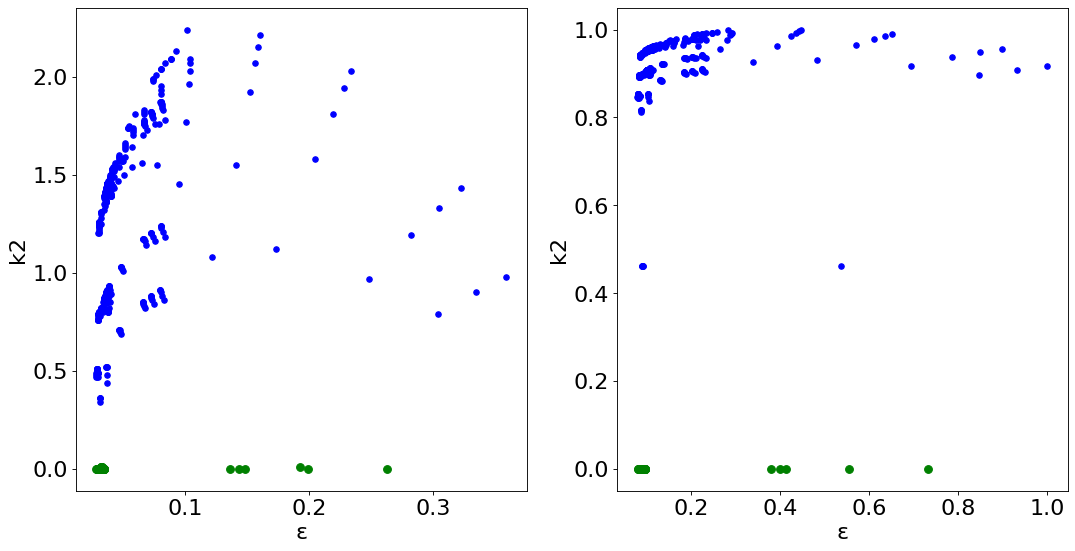

In [4]:
AL.results_visualization()

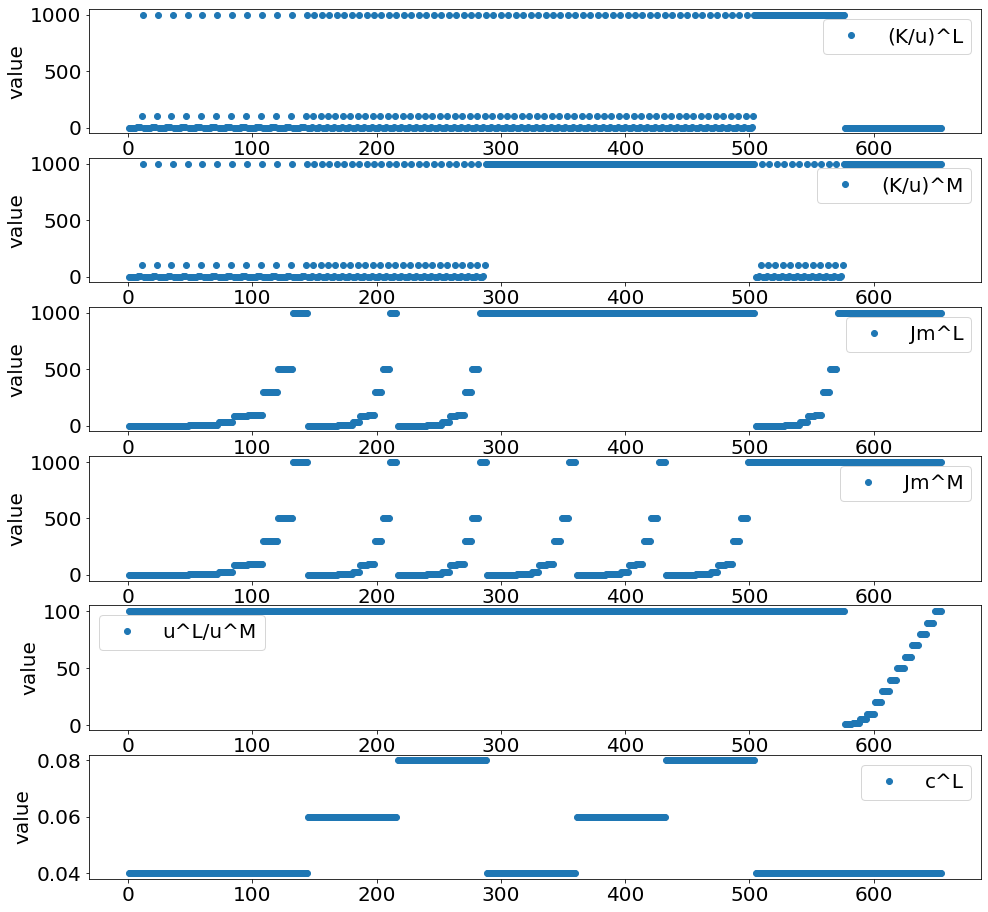

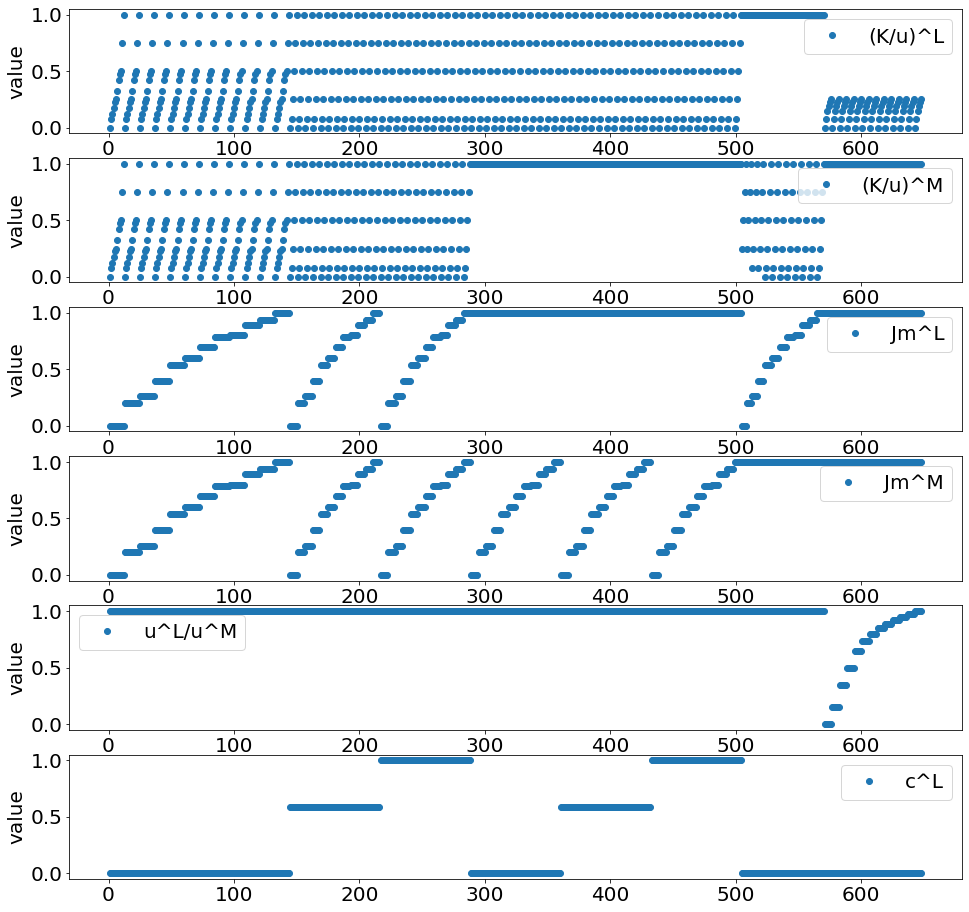

In [19]:
AL.prediction_visualization()

<font color=black size=7 face="Times New Roman"> One Hidden Layer in forward</font>

ANN_L1(
  (hidden_layer): Linear(in_features=6, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 10.734414


,0,1
0,0.088520,0.445941
1,0.086291,0.415756
2,0.086828,0.492627
3,0.093155,0.354109
4,0.084700,0.534776
...,...,...
191,0.207333,1.248190
192,0.111397,0.986923
193,0.180436,1.167849
194,0.172938,0.831145


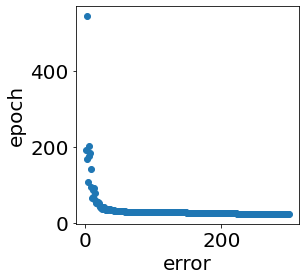

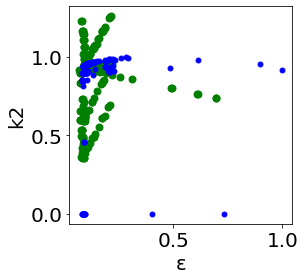

In [5]:
n_train = 300
n_hidden_layer = [10]
learning_rate = 0.1

AL.ANN_Linear_train_test(n_train, n_hidden_layer, learning_rate, backward = False)

ANN_L1(
  (hidden_layer): Linear(in_features=6, out_features=20, bias=True)
  (predict_layer): Linear(in_features=20, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 4.704858


,0,1
0,0.073277,0.104095
1,0.116978,0.009741
2,0.075362,0.209476
3,0.113720,0.301998
4,0.085086,0.101208
...,...,...
191,0.072815,0.695478
192,0.212511,0.928773
193,0.130719,0.917134
194,0.105506,0.842063


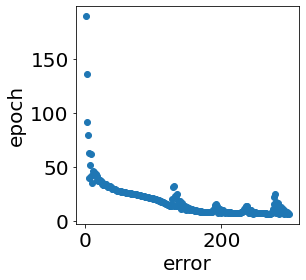

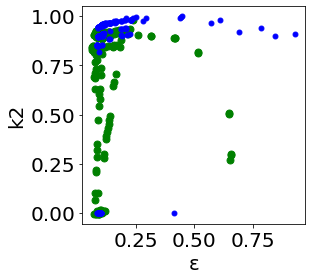

In [6]:
n_train = 300
n_hidden_layer = [20]
learning_rate = 0.1

AL.ANN_Linear_train_test(n_train, n_hidden_layer, learning_rate, backward = False)

ANN_L1(
  (hidden_layer): Linear(in_features=6, out_features=30, bias=True)
  (predict_layer): Linear(in_features=30, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 11.708436


,0,1
0,0.137958,0.424974
1,0.138189,0.453162
2,0.138114,0.443996
3,0.137717,0.395739
4,0.138330,0.470298
...,...,...
191,0.143179,1.060290
192,0.142621,0.992328
193,0.143483,1.097262
194,0.142040,0.921686


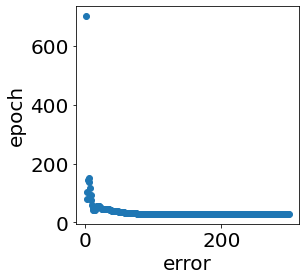

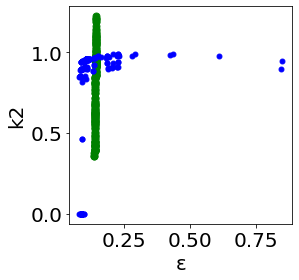

In [7]:
n_train = 300
n_hidden_layer = [30]
learning_rate = 0.1

AL.ANN_Linear_train_test(n_train, n_hidden_layer, learning_rate, backward = False)

In [8]:
'''net = ANN_L1(n_feature = dim_input, n_hidden = n_hidden_layer, n_output = dim_output)#initialization of ANN
print(net)

# train net with optimization method chose
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# error computation method
loss_func = torch.nn.MSELoss()
# divide dataset into train set and test set
train_macro, test_macro = train_test_split(df_processed_macro, train_size = 0.7)
train_micro, test_micro = train_test_split(df_processed_micro, train_size = 0.7)
train = pd.concat( [train_macro, train_micro], axis=0)
test = pd.concat( [test_macro, test_micro], axis=0)
train_input_tensor = torch.tensor(train.iloc[:,0:6].values)
train_output_tensor = torch.tensor(train.iloc[:,6:].values)
test_input_tensor = torch.tensor(test.iloc[:,0:6].values)
test_output_tensor = torch.tensor(test.iloc[:,6:].values)

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.set_ylabel('epoch', fontsize=20)
ax1.set_xlabel('error', fontsize=20)
plt.tick_params(labelsize=20)


def frame_maker(train):
    global error
    error = pd.DataFrame(columns=['epoch','error'])
    # start training and :ilustrate the 
    for i in range(n_train):
        # input data to predict
        prediction = net(train_input_tensor.float())
    
        # error between expected data and predicted data, pay attention on consequence
        # first is predicted, second is real value
        loss = loss_func(prediction, train_output_tensor.float())

        # start optimize
        # set gradient as 0 before each optimization
        optimizer.zero_grad()
    
        # error pachpropogation
        loss.backward()
    
        # optimize parameters based on minimum loss
        optimizer.step()
    
        #print(i)
        #print(loss.data.numpy())
        # plot the error in every epoch
        #ax1.scatter(i, loss.data.numpy(), s = 24, c = 'b')
        error = error.append(pd.DataFrame({'epoch':[i],'error':[loss.data.numpy()]}))
        ax1.scatter(error['epoch'], error['error'])
        #ax1.plot(i, loss.data.numpy(), c='r')
        #plt.pause(0.1)

ani = animation.FuncAnimation(fig1, frame_maker, frames=list(range(299)))
html = ani.to_html5_video()
plt.close(fig1)
HTML(html)'''

"net = ANN_L1(n_feature = dim_input, n_hidden = n_hidden_layer, n_output = dim_output)#initialization of ANN\nprint(net)\n\n# train net with optimization method chose\noptimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)\n# error computation method\nloss_func = torch.nn.MSELoss()\n# divide dataset into train set and test set\ntrain_macro, test_macro = train_test_split(df_processed_macro, train_size = 0.7)\ntrain_micro, test_micro = train_test_split(df_processed_micro, train_size = 0.7)\ntrain = pd.concat( [train_macro, train_micro], axis=0)\ntest = pd.concat( [test_macro, test_micro], axis=0)\ntrain_input_tensor = torch.tensor(train.iloc[:,0:6].values)\ntrain_output_tensor = torch.tensor(train.iloc[:,6:].values)\ntest_input_tensor = torch.tensor(test.iloc[:,0:6].values)\ntest_output_tensor = torch.tensor(test.iloc[:,6:].values)\n\nfig1, ax1 = plt.subplots(figsize=(8,8))\nax1.set_ylabel('epoch', fontsize=20)\nax1.set_xlabel('error', fontsize=20)\nplt.tick_params(labelsize=20

<font color=black size=7 face="Times New Roman"> Two Hidden Layer in forward </font>

ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 10.900977


,0,1
0,0.100157,0.332708
1,0.101021,0.343175
2,0.096833,0.292455
3,0.111859,0.474423
4,0.101775,0.352300
...,...,...
191,0.124837,0.631604
192,0.150089,0.937416
193,0.156534,1.015473
194,0.159366,1.049764


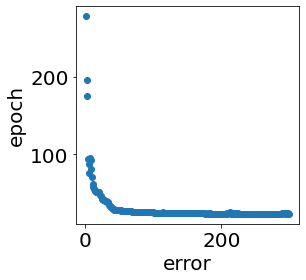

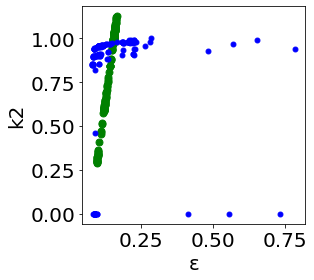

In [9]:
n_train = 300
n_hidden_layer = [10, 10]
learning_rate = 0.1

AL.ANN_Linear_train_test(n_train, n_hidden_layer, learning_rate, backward = False)

ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 3.6955004


,0,1
0,0.086993,0.026186
1,0.080976,0.415317
2,0.086993,0.026186
3,0.086993,0.026186
4,0.093431,0.850663
...,...,...
191,0.102617,0.950602
192,0.099993,0.944396
193,0.091195,0.854141
194,0.091941,0.905873


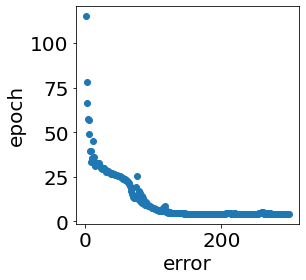

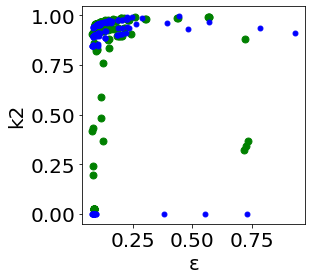

In [10]:
n_train = 300
n_hidden_layer1 = [20, 20]
learning_rate = 0.1

AL.ANN_Linear_train_test(n_train, n_hidden_layer, learning_rate, backward = False)

ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=30, bias=True)
  (hidden_layer2): Linear(in_features=30, out_features=30, bias=True)
  (predict_layer): Linear(in_features=30, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 22.107594


,0,1
0,0.143209,0.809044
1,0.143209,0.809044
2,0.143209,0.809044
3,0.143209,0.809044
4,0.143209,0.809044
...,...,...
191,0.143209,0.809044
192,0.143209,0.809044
193,0.143209,0.809044
194,0.143209,0.809044


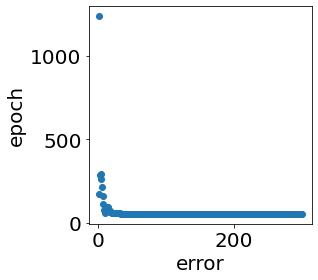

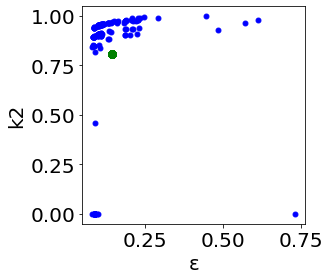

In [11]:
n_train = 300
n_hidden_layer = [30, 30]
learning_rate = 0.1

AL.ANN_Linear_train_test(n_train, n_hidden_layer, learning_rate, backward = False)

<font color=black size=7 face="Times New Roman"> Three Hidden Layer in forward </font>

ANN_L3(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (hidden_layer3): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 7.428864


,0,1
0,0.101382,0.018012
1,0.101382,0.018012
2,0.101382,0.018012
3,0.101382,0.018012
4,0.101382,0.018012
...,...,...
191,0.132058,0.351957
192,0.138029,0.932907
193,0.138029,0.932907
194,0.138029,0.932907


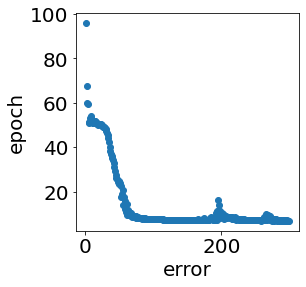

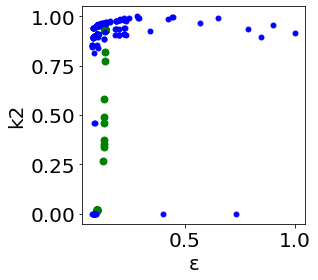

In [12]:
n_train = 300
n_hidden_layer = [10, 10, 10]
learning_rate = 0.1

AL.ANN_Linear_train_test(n_train, n_hidden_layer, learning_rate, backward = False)

ANN_L3(
  (hidden_layer1): Linear(in_features=6, out_features=20, bias=True)
  (hidden_layer2): Linear(in_features=20, out_features=20, bias=True)
  (hidden_layer3): Linear(in_features=20, out_features=20, bias=True)
  (predict_layer): Linear(in_features=20, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 24.196629


,0,1
0,0.135901,0.808972
1,0.135901,0.808972
2,0.135901,0.808972
3,0.135901,0.808972
4,0.135901,0.808972
...,...,...
191,0.135901,0.808972
192,0.135901,0.808972
193,0.135901,0.808972
194,0.135901,0.808972


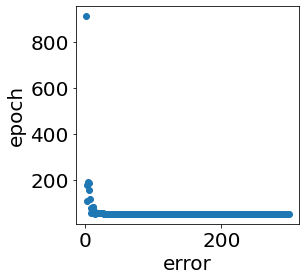

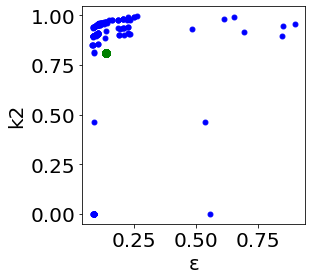

In [13]:
n_train = 300
n_hidden_layer = [20, 20, 20]
learning_rate = 0.1

AL.ANN_Linear_train_test(n_train, n_hidden_layer, learning_rate, backward = False)

ANN_L3(
  (hidden_layer1): Linear(in_features=6, out_features=20, bias=True)
  (hidden_layer2): Linear(in_features=20, out_features=20, bias=True)
  (hidden_layer3): Linear(in_features=20, out_features=20, bias=True)
  (predict_layer): Linear(in_features=20, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 4.9651113


,0,1
0,0.118988,0.023839
1,0.118988,0.023839
2,0.118988,0.023839
3,0.118988,0.023839
4,0.137249,0.840064
...,...,...
191,0.138603,0.900615
192,0.139559,0.943325
193,0.139559,0.943325
194,0.139559,0.943325


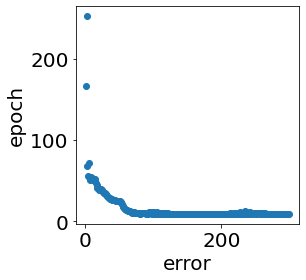

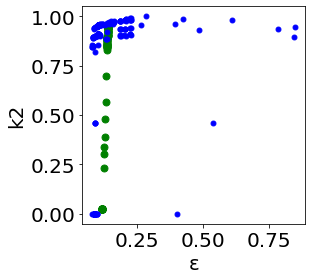

In [14]:
n_train = 300
n_hidden_layer1 = [30, 30, 30]
learning_rate = 0.1

AL.ANN_Linear_train_test(n_train, n_hidden_layer, learning_rate, backward = False)

ANN_L3(
  (hidden_layer1): Linear(in_features=6, out_features=40, bias=True)
  (hidden_layer2): Linear(in_features=40, out_features=40, bias=True)
  (hidden_layer3): Linear(in_features=40, out_features=40, bias=True)
  (predict_layer): Linear(in_features=40, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 23.140049


,0,1
0,0.138957,0.810722
1,0.138957,0.810722
2,0.138957,0.810722
3,0.138957,0.810722
4,0.138957,0.810722
...,...,...
191,0.138957,0.810722
192,0.138957,0.810722
193,0.138957,0.810722
194,0.138957,0.810722


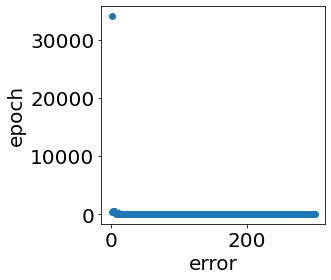

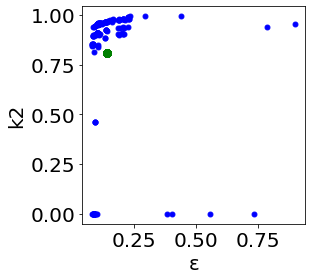

In [15]:
n_train = 300
n_hidden_layer = [40, 40, 40]
learning_rate = 0.1

AL.ANN_Linear_train_test(n_train, n_hidden_layer, learning_rate, backward = False)